# Inha_AI_2022

In [2]:
# !pip install plotly

^C


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import plotly.plotly as py
# from plotly.offline import init_notebook_mode, iplot # plotly offline mode
# init_notebook_mode(connected=True) 
# import plotly.graph_objs as go # plotly graphical object

import warnings
warnings.filterwarnings("ignore")

In [3]:
train_data = pd.read_csv("./data/train_data.csv")
sample_submission = pd.read_csv("./data/sample_submission.csv")
turb_location = pd.read_csv("./data/turb_location.CSV")

# EDA

## train_data

In [4]:
print(train_data.shape)
train_data.head()

(3859200, 13)


,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36


In [5]:
train_data.columns

Index(['TurbID', 'Day', 'Tmstamp', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir',
       'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv'],
      dtype='object')

In [6]:
# TurbID
# 200 x 144 = 28800
print(train_data['TurbID'].value_counts().sort_index())
print("\n", train_data['TurbID'].unique())
print("\n# of TurbID : {}".format(len(train_data['TurbID'].unique())))

1      28800
2      28800
3      28800
4      28800
5      28800
       ...  
130    28800
131    28800
132    28800
133    28800
134    28800
Name: TurbID, Length: 134, dtype: int64

 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134]

# of TurbID : 134


In [7]:
# Day
# 134 x 144 = 19296
print(train_data['Day'].value_counts().sort_index())
print("\n", train_data['Day'].unique())
print("\n# of Day : {}".format(len(train_data['Day'].unique())))

1      19296
2      19296
3      19296
4      19296
5      19296
       ...  
196    19296
197    19296
198    19296
199    19296
200    19296
Name: Day, Length: 200, dtype: int64

 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]

# of

In [8]:
# Tmstamp
# 134 x 200 = 26800
print(train_data['Tmstamp'].value_counts().sort_index())
print("\n", train_data['Tmstamp'].unique())
print("\n# of Tmstamp : {}".format(len(train_data['Tmstamp'].unique())))

00:00    26800
00:10    26800
00:20    26800
00:30    26800
00:40    26800
         ...  
23:10    26800
23:20    26800
23:30    26800
23:40    26800
23:50    26800
Name: Tmstamp, Length: 144, dtype: int64

 ['00:00' '00:10' '00:20' '00:30' '00:40' '00:50' '01:00' '01:10' '01:20'
 '01:30' '01:40' '01:50' '02:00' '02:10' '02:20' '02:30' '02:40' '02:50'
 '03:00' '03:10' '03:20' '03:30' '03:40' '03:50' '04:00' '04:10' '04:20'
 '04:30' '04:40' '04:50' '05:00' '05:10' '05:20' '05:30' '05:40' '05:50'
 '06:00' '06:10' '06:20' '06:30' '06:40' '06:50' '07:00' '07:10' '07:20'
 '07:30' '07:40' '07:50' '08:00' '08:10' '08:20' '08:30' '08:40' '08:50'
 '09:00' '09:10' '09:20' '09:30' '09:40' '09:50' '10:00' '10:10' '10:20'
 '10:30' '10:40' '10:50' '11:00' '11:10' '11:20' '11:30' '11:40' '11:50'
 '12:00' '12:10' '12:20' '12:30' '12:40' '12:50' '13:00' '13:10' '13:20'
 '13:30' '13:40' '13:50' '14:00' '14:10' '14:20' '14:30' '14:40' '14:50'
 '15:00' '15:10' '15:20' '15:30' '15:40' '15:50' '16:00' '16:1

In [9]:
train_data[train_data['TurbID'] == 134]

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
3830400,134,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3830401,134,1,00:10,4.85,-10.32,30.83,30.59,7.30,0.23,0.23,0.23,-0.01,275.66
3830402,134,1,00:20,4.33,-2.95,30.79,30.58,-4.94,0.03,0.03,0.03,-0.04,267.17
3830403,134,1,00:30,4.25,-2.42,30.77,30.50,-4.95,0.04,0.04,0.04,-0.04,256.78
3830404,134,1,00:40,4.22,-3.87,30.72,30.49,-4.95,0.02,0.02,0.02,-0.05,246.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3859195,134,200,23:10,4.86,4.68,9.04,10.40,174.39,0.01,0.01,0.01,-108.13,308.65
3859196,134,200,23:20,4.46,-4.00,8.79,10.33,179.76,0.01,0.01,0.01,-93.64,221.60
3859197,134,200,23:30,4.23,-0.08,8.74,10.22,172.35,0.01,0.01,0.01,-111.20,220.60
3859198,134,200,23:40,4.36,-6.12,8.64,10.10,172.35,0.01,0.01,0.01,-108.04,222.15


### NULL

In [10]:
# 결측값 처리
print(train_data.isnull().sum())

TurbID         0
Day            0
Tmstamp        0
Wspd       45587
Wdir       45587
Etmp       45587
Itmp       45587
Ndir       45587
Pab1       45587
Pab2       45587
Pab3       45587
Prtv       45587
Patv       45587
dtype: int64


In [11]:
# 다 같은 행임
# target도 null 값이 있음...
print(sum(train_data['Wspd'].isnull() & train_data['Wdir'].isnull()))
print(sum(train_data['Wspd'].isnull() & train_data['Etmp'].isnull()))
print(sum(train_data['Wspd'].isnull() & train_data['Itmp'].isnull()))
print(sum(train_data['Wspd'].isnull() & train_data['Ndir'].isnull()))
print(sum(train_data['Wspd'].isnull() & train_data['Pab1'].isnull()))
print(sum(train_data['Wspd'].isnull() & train_data['Pab2'].isnull()))
print(sum(train_data['Wspd'].isnull() & train_data['Pab3'].isnull()))
print(sum(train_data['Wspd'].isnull() & train_data['Prtv'].isnull()))
print(sum(train_data['Wspd'].isnull() & train_data['Patv'].isnull()))

45587
45587
45587
45587
45587
45587
45587
45587
45587


### Visualization

- TurbID 상관없이 시각화
- TurbID 구분해서 시각화

| columns
- TurbID - 발전기 ID
- Day - 날짜
- Tmstamp - 시간
- Wspd - 풍속
- Wdir - 터빈이 바라보는 각도와 실제 바람 방향 각도 차이
- Etmp - 외부 온도
- Itmp - 터빈 내부 온도
- Ndir - 터빈이 바라보는 방향 각도
- Pab - 터빈 당 3개의 날이 있으며 각각의 각도가 다름
- Prtv - 무효전력 : 에너지원을 필요로  하지 않는 전력
- Patv - 유효전력 : 실제로 터빈을 돌리는 일을 하는 전력

In [17]:
train_data.columns

Index(['TurbID', 'Day', 'Tmstamp', 'Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir',
       'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv'],
      dtype='object')

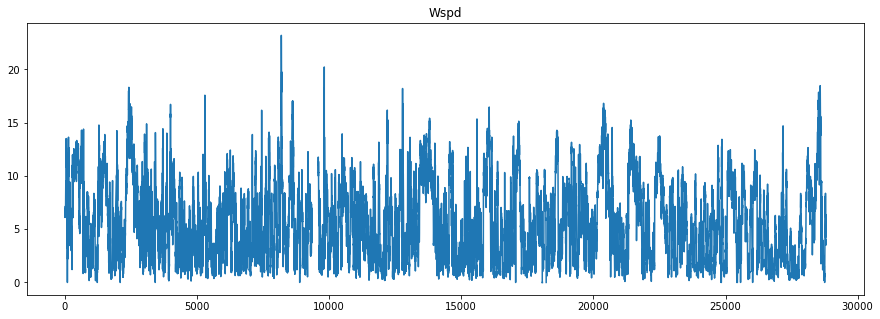

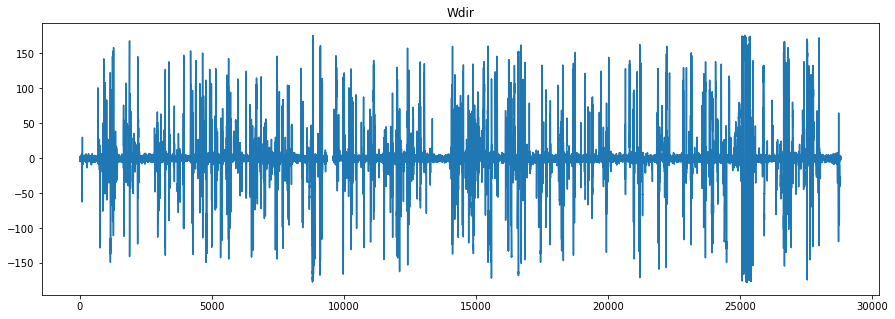

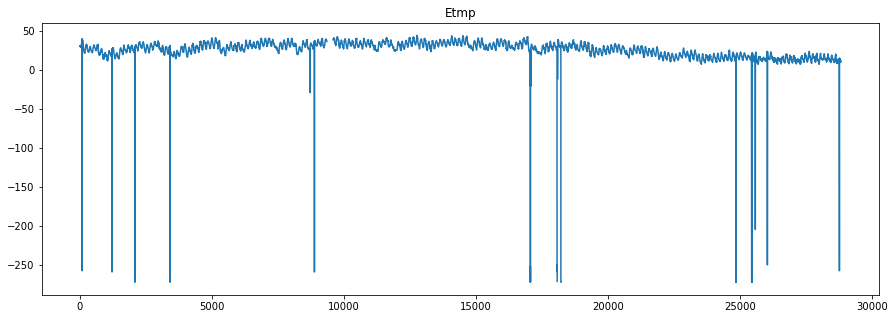

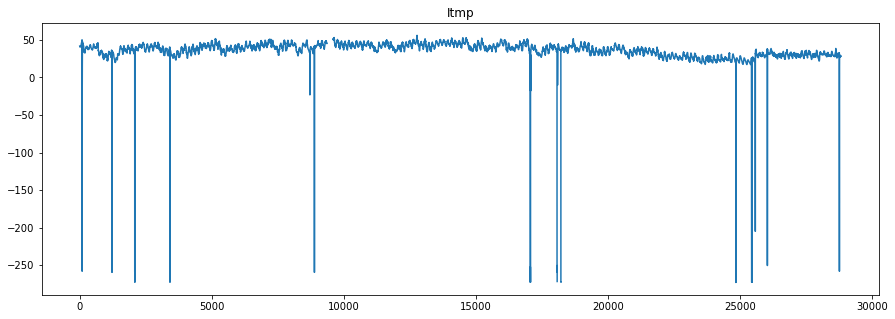

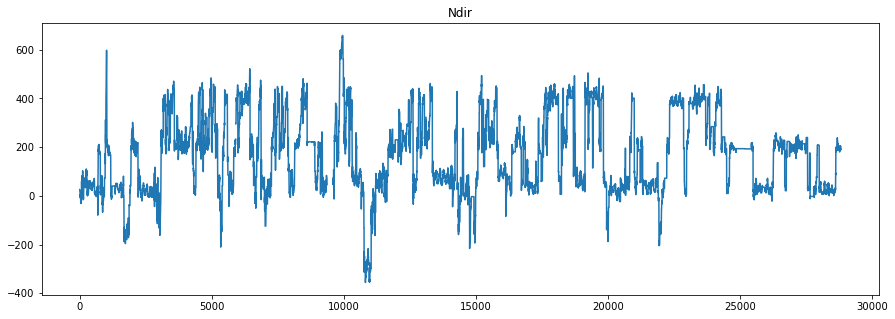

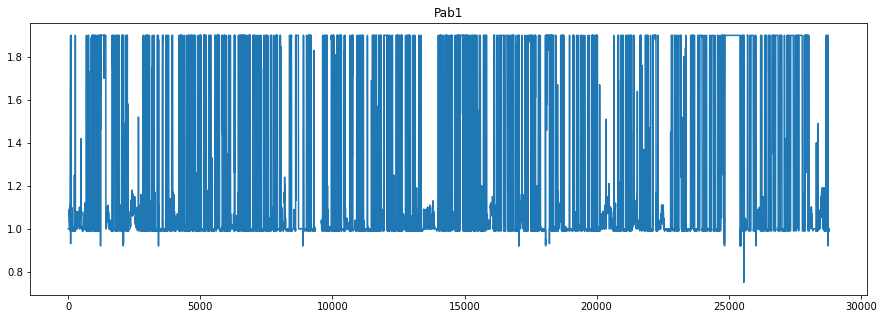

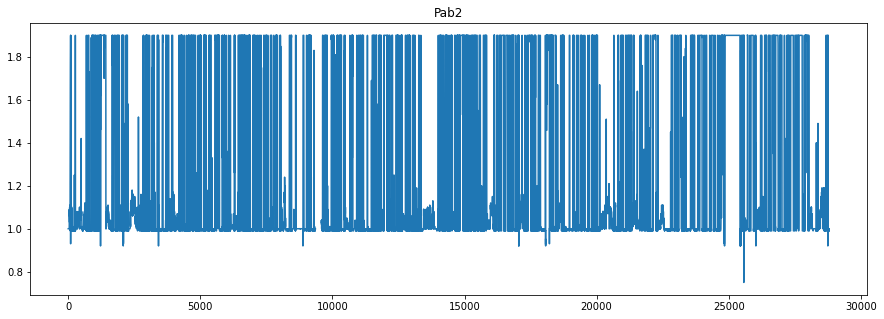

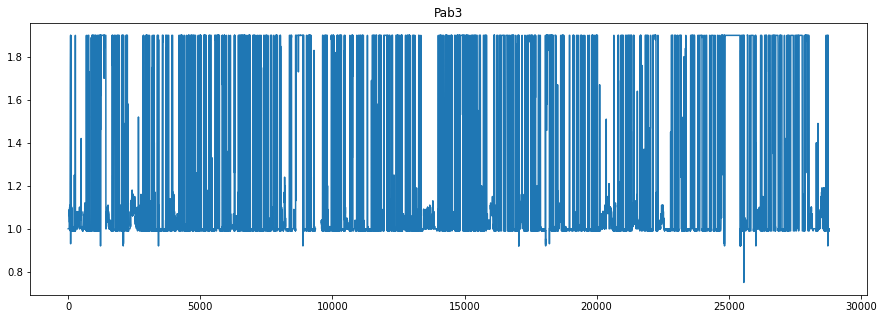

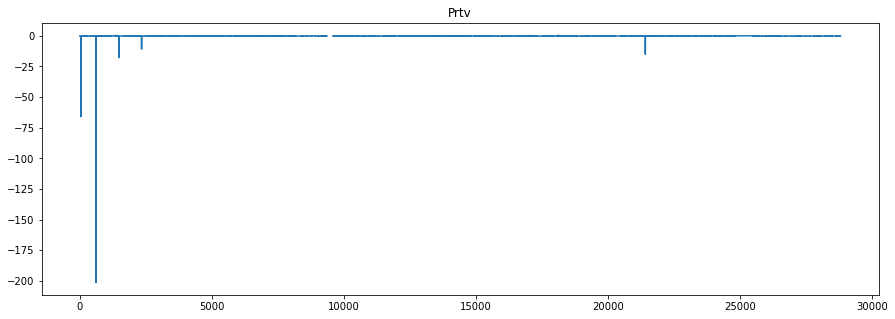

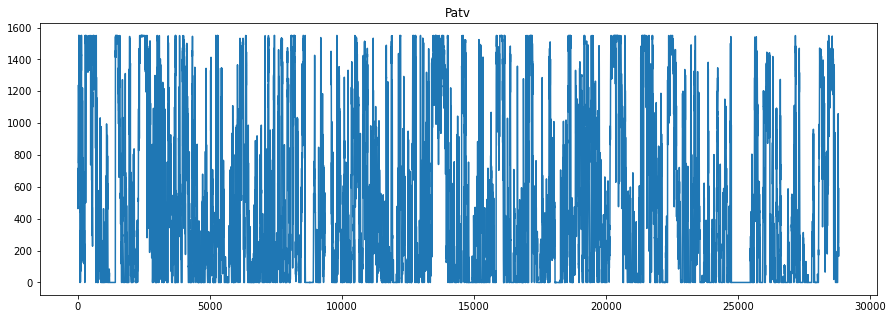

In [21]:
columns = ['Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2', 'Pab3', 'Prtv', 'Patv']
for col in columns:
    plt.figure(figsize=(15,5))
    plt.plot(train_data[train_data["TurbID"] == 1][col])
    plt.title("{}".format(col))
    plt.show()

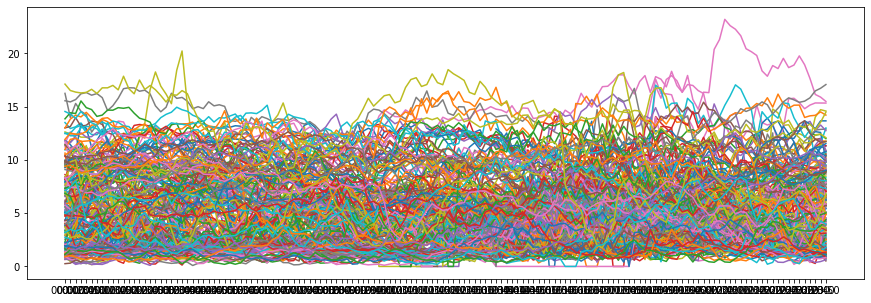

In [12]:
# TurbId = 1일 때, Tmstamp vs Wspd
plt.figure(figsize=(15,5))
for i in train_data['Day'].unique():
    plt.plot(train_data[train_data['TurbID'] == 1][train_data['Day'] == i]['Tmstamp'], train_data[train_data['TurbID'] == 1][train_data['Day'] == i]['Wspd'])
plt.show()

In [48]:
train_data[train_data['TurbID'] == 1]['Pab1']

0         NaN
1        1.00
2        1.00
3        1.00
4        1.00
         ... 
28795    0.99
28796    0.99
28797    0.99
28798    0.99
28799    0.99
Name: Pab1, Length: 28800, dtype: float64

In [36]:
train_data['Prtv'].value_counts()

-0.30      903991
 0.00       96691
-0.31       18490
-0.32       10535
-0.29        6873
            ...  
-254.18         1
 243.31         1
-427.37         1
-419.39         1
-319.41         1
Name: Prtv, Length: 66119, dtype: int64

In [37]:
train_data['Patv'].value_counts()

0.00       1078677
224.44         602
224.41         586
224.43         572
224.42         562
            ...   
1530.63          1
1404.46          1
1529.87          1
1528.03          1
1381.02          1
Name: Patv, Length: 153351, dtype: int64

In [38]:
train_data[train_data['Patv']<0]['Patv'].value_counts()

Series([], Name: Patv, dtype: int64)

In [33]:
print(train_data[(train_data["TurbID"] == 1) & (train_data["Etmp"]<0)]["Prtv"].value_counts())
print(train_data[(train_data["TurbID"] == 1) & (train_data["Etmp"]<0)]["Patv"].value_counts())

 0.00    82
-0.26     1
Name: Prtv, dtype: int64
0.0    83
Name: Patv, dtype: int64


In [46]:
print(train_data[(train_data["TurbID"] == 1) & (train_data["Itmp"]<0)]["Prtv"].value_counts())
print(train_data[(train_data["TurbID"] == 1) & (train_data["Itmp"]<0)]["Patv"].value_counts())

 0.00    82
-0.26     1
Name: Prtv, dtype: int64
0.0    83
Name: Patv, dtype: int64


In [56]:
sum((train_data["Pab1"] == train_data['Pab2']) &  (train_data['Pab2'] == train_data['Pab3']))

2484968

In [64]:
train_data[(train_data['Day'] == 1) & (train_data['Tmstamp'] == "00:00")]

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28800,2,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57600,3,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86400,4,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115200,5,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3715200,130,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3744000,131,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3772800,132,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3801600,133,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
train_data[(train_data['Day'] == 200) & (train_data['Tmstamp'] == "23:50")]

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
28799,1,200,23:50,3.97,0.92,10.96,28.46,191.23,0.99,0.99,0.99,-0.27,218.70
57599,2,200,23:50,3.76,0.74,3.16,18.01,224.55,0.49,0.49,0.49,-93.24,195.85
86399,3,200,23:50,4.02,-7.78,8.04,21.63,443.92,0.01,0.01,0.01,-81.46,218.39
115199,4,200,23:50,3.30,6.11,13.55,12.95,196.01,0.01,0.01,0.01,-73.28,154.20
143999,5,200,23:50,3.50,3.76,6.82,13.57,188.91,0.01,0.01,0.01,-78.78,163.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743999,130,200,23:50,3.88,-2.32,8.80,14.96,315.58,0.01,0.01,0.01,-81.62,169.86
3772799,131,200,23:50,4.23,1.58,8.47,19.61,495.44,0.01,0.01,0.01,-96.78,236.35
3801599,132,200,23:50,4.96,-1.99,8.40,27.74,219.91,0.01,0.00,0.01,-110.77,230.80
3830399,133,200,23:50,3.69,-6.95,10.19,12.94,177.97,0.01,0.01,0.01,-108.56,232.06


## sample_submission

In [69]:
sample_submission

,index,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,0,1,201,00:00,0,0,0,0,0,0,0,0,0,9999
1,1,1,201,00:10,0,0,0,0,0,0,0,0,0,9999
2,2,1,201,00:20,0,0,0,0,0,0,0,0,0,9999
3,3,1,201,00:30,0,0,0,0,0,0,0,0,0,9999
4,4,1,201,00:40,0,0,0,0,0,0,0,0,0,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38587,38587,134,202,23:10,0,0,0,0,0,0,0,0,0,9999
38588,38588,134,202,23:20,0,0,0,0,0,0,0,0,0,9999
38589,38589,134,202,23:30,0,0,0,0,0,0,0,0,0,9999
38590,38590,134,202,23:40,0,0,0,0,0,0,0,0,0,9999


In [71]:
sample_submission[sample_submission['TurbID'] == 1]

,index,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,0,1,201,00:00,0,0,0,0,0,0,0,0,0,9999
1,1,1,201,00:10,0,0,0,0,0,0,0,0,0,9999
2,2,1,201,00:20,0,0,0,0,0,0,0,0,0,9999
3,3,1,201,00:30,0,0,0,0,0,0,0,0,0,9999
4,4,1,201,00:40,0,0,0,0,0,0,0,0,0,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,283,1,202,23:10,0,0,0,0,0,0,0,0,0,9999
284,284,1,202,23:20,0,0,0,0,0,0,0,0,0,9999
285,285,1,202,23:30,0,0,0,0,0,0,0,0,0,9999
286,286,1,202,23:40,0,0,0,0,0,0,0,0,0,9999


## turb_location

In [42]:
# turb_location은 같은 ID면 같으니까 모든 turb가 있을때 의미 있지 않을까
print(turb_location.shape)

turb_location.head()

(134, 3)


,TurbID,x,y
0,1,3349.8515,5939.23193
1,2,3351.0017,6416.64673
2,3,3314.7797,6892.18395
3,4,3352.0940,7366.14203
4,5,3355.3420,7841.20175


# Auto ML : FEDOT
- https://github.com/nccr-itmo/FEDOT
- https://github.com/ITMO-NSS-team/fedot_electro_ts_case/blob/main/case/fedot_ts_case.ipynb

# ARMA, ARIMA

- https://builtin.com/data-science/time-series-forecasting-python

In [60]:
train_data.head()

,TurbID,Day,Tmstamp,Wspd,Wdir,Etmp,Itmp,Ndir,Pab1,Pab2,Pab3,Prtv,Patv
0,1,1,00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,00:10,6.17,-3.99,30.73,41.80,25.92,1.0,1.0,1.0,-0.25,494.66
2,1,1,00:20,6.27,-2.18,30.60,41.63,20.91,1.0,1.0,1.0,-0.24,509.76
3,1,1,00:30,6.42,-0.73,30.52,41.52,20.91,1.0,1.0,1.0,-0.26,542.53
4,1,1,00:40,6.25,0.89,30.49,41.38,20.91,1.0,1.0,1.0,-0.23,509.36


In [1]:
train_data[train_data['TurbID'] == 1]

NameError: name 'train_data' is not defined

## ARMA

In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
y = train_data[(train_data['TurbID'] == 1)]['Wspd']
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

y_pred = ARMAmodel.get_forecast(sample_submission[sample_submission['TurbID'] == 1].shape[0])
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

y_pred_df.index = sample_submission[sample_submission['TurbID'] == 1].index
y_pred_out = y_pred_df["Predictions"] 

NameError: name 'train_data' is not defined

## ARIMA

In [84]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
y = train_data[(train_data['TurbID'] == 1)]['Wspd']
ARIMAmodel = ARIMA(y, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(sample_submission[sample_submission['TurbID'] == 1].shape[0])
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

y_pred_df.index = sample_submission[sample_submission['TurbID'] == 1].index
y_pred_out = y_pred_df["Predictions"] 

# Prediction

In [94]:
train_data = train_data.fillna(method = 'bfill')

In [95]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [96]:
col_lst = ['Wspd', 'Wdir', 'Etmp', 'Itmp', 'Ndir', 'Pab1', 'Pab2', 'Pab3', 'Prtv']

In [97]:
sample_submission_c = sample_submission.copy()

for col in col_lst:
    for i in range(1,135,1):
        y = train_data[(train_data['TurbID'] == i)][col]
        ARMAmodel = SARIMAX(y, order = (1, 0, 1))
        ARMAmodel = ARMAmodel.fit()

        y_pred = ARMAmodel.get_forecast(sample_submission_c[sample_submission_c['TurbID'] == i].shape[0])
        y_pred_df = y_pred.conf_int(alpha = 0.05) 
        y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])

        y_pred_df.index = sample_submission_c[sample_submission_c['TurbID'] == i].index
        y_pred_out = y_pred_df["Predictions"]
        
        sample_submission_c[sample_submission_c['TurbID'] == i][col] = y_pred_out

c:\Users\User\anaconda3\envs\inha\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\envs\inha\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\anaconda3\envs\inha\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\User\anaconda3\envs\inha\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\User\anaconda3\envs\inha\lib\site-packages\statsmodels\tsa\base\tsa_mod

KeyboardInterrupt: 